9.2 워드투벡터(Word2Vec)

앞서 원-핫 벡터는 단어 벡터 간 유의미한 유사도를 계산할 수 없다는 단점이 존재하였다. 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 구할 수 있는 방법인 Word2Vec을 사용해보자.

워드투벡터의 예시\
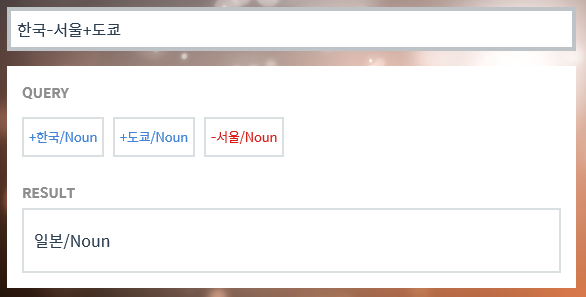

1. 희소 표현 \
행렬의 대부분 값이 0으로 표현되는 방법을 희소 표현이라고 한다. 이러한 방법은 단어 벡터간 유의미한 유사도를 표현할 수 없다는 단점이 있었고, 대안으로 단어의 의미를 다차원 공간에 벡터화하는 방법을 사용하는데 이러한 표현을 분산 표현이라고 한다.

2. 분산 표현\
분산 표현 방법은 기본적으로 분포 가설이라는 가정 하에 만들어진 표현 방법이다. 이 가정은 '비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다.'라는 가정이다. \
ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]\
ex) 강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2] \
요약하자면 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현한다. 이런 표현 방법을 사용하면 단어 벡터 간의 유의미한 유사도를 계산할 수 있다.

3. CBOW(Continuous Bag of Words)

Word2Vec의 학습 방식에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다.\
CBOW는 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법이다.\
Skip-Gram은 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법이다. 

CBOW의 예시\
예문 : "The fat cat sat on the mat" \
["The","fat","cat","on","the","mat"]으로부터 sat을 예측하려고 하는데, 이때 예측해야하는 단어 sat을 중심 단어라고 하고, 예측에 사용되는 단어들을 주변 단어라고 한다.\
여기서 앞,뒤로 몇 개의 단어를 볼지를 결정해야 하는데 이 범위를 윈도우라고 한다. \
예를 들어 윈도우의 크기가 2이고, 중심 단어가 sat이라면 fat과 cat 그리고 The와 on을 입력으로 사용한다.\
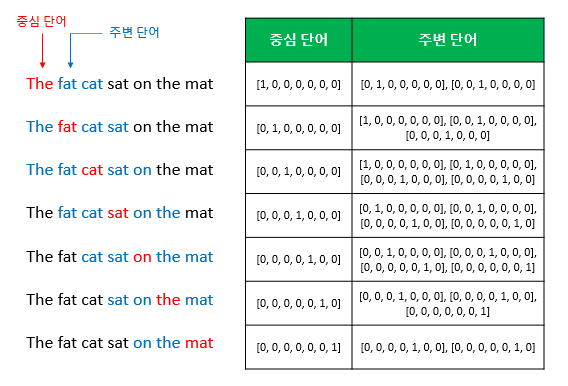\
윈도우 크기가 정해지면 윈도우를 옆으로 움직여서 주변 단어와 중심 단어의 선택을 변형해가며 학습을 위한 데이터 셋을 만드는데 \
이 방법을 슬라이딩 윈도우라고 한다.

CBOW의 인공 신경망을 간단히 도식화하면 아래와 같다. \
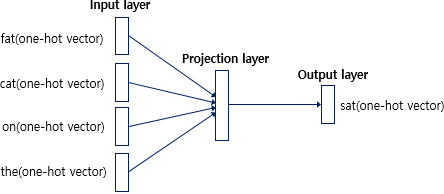\
입력층의 입력으로서 앞,뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고,\
출력층에서 예측하고자 하는 중간 단어의 원-핫 벡터가 레이블로서 필요하다.

위 그림에서 알 수  있듯이, Word2Vec은 은닉층이 1개인 얕은 신경망이라는 점이다. 또한 Word2Vec의 은닉층은 일반적인 은닉층과는 달리\
활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 투사층이라고 부르기도 한다.

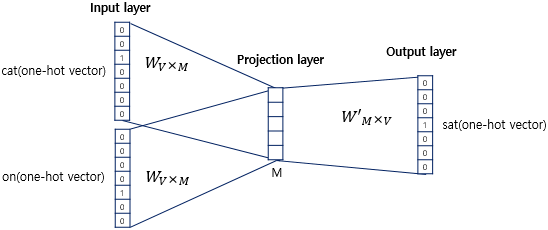\
위 그림에서 보면 투사층의 크기는 M 이다. CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 된다.\
두번째는 입력층과 투사층 사이의 가중치 W는 V x M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M x V 행렬이다.\
여기서 V는 단어 집합의 크기를 의미한다.

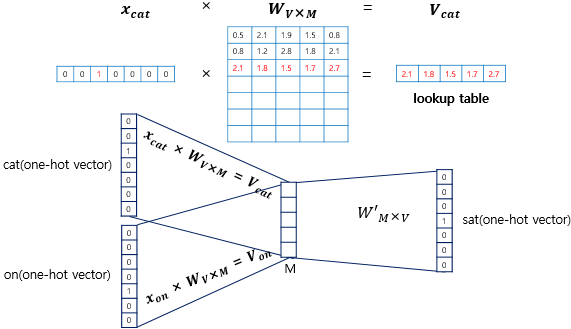\
위 그림에서는 각 주변 단어의 원-핫 벡터를 x로 표기하였다. 입력 벡터는 원-핫 벡터이다. \
i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 i번째 행을 그대로 읽어오는 것(lookup)과 동일하다. 이 작업을 룩업테이블이라고 한다.

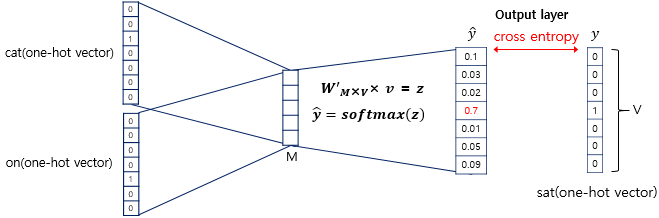\
이렇게 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 된다.\
만약 윈도우 크기가 n=2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해 총 4개가 입력 벡터로 사용된다.\
투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 하다.(Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않는다.)

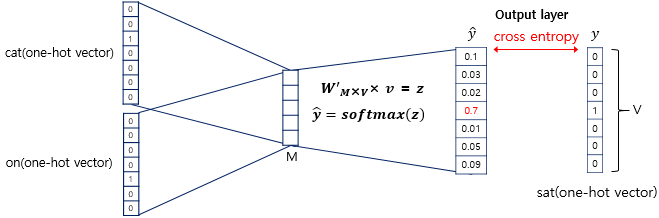\
이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해진다. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나온다.\
이 벡터에 CBOW는 소프트맥스 함수를 지나면서 벡터의 각 원소들의 값은 0과 1사이로 총 합은 1이 된다.\
다중 클래스 분류 문제를 위한 일종의 스코어 벡터이다. 스코어 벡터의 j번째 값은 j번째 단어가 중심 단어일 확률을 나타낸다\
스코어 벡터를 y_hat, 중심 단어의 원-핫 벡터를 y라고 했을 때, 두 벡터값의 오차를 줄이기 위해 CBOW는 손실 함수로 크로스 엔트로피 함수를 사용한다.\
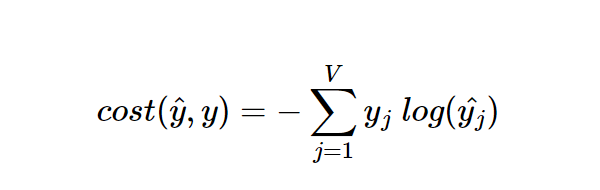\
역전파를 수행하면 W와 W'가 학습이 되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행렬의 행을 각 단어의 임베딩 벡터로 사용하거나 W와 W'행렬 두 가지 모두를 가지고 임베딩 벡터를 사용하기도 한다.

4. Skip-Gram

Skip-Gram은 CBOW와 반대로 중심 단어에서 주변 단어를 예측한다. \
윈도우 크기가 2일때, 데이터 셋\
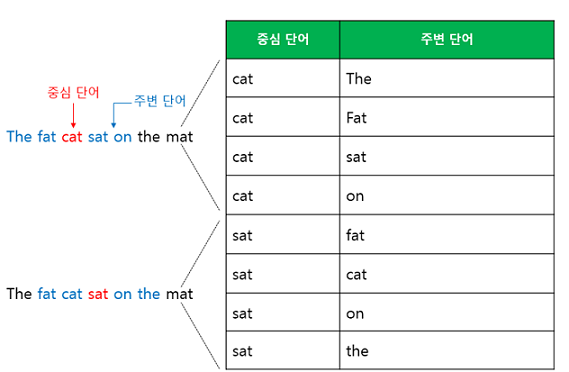

인공 신경망으로 나타내면 아래와 같다.\
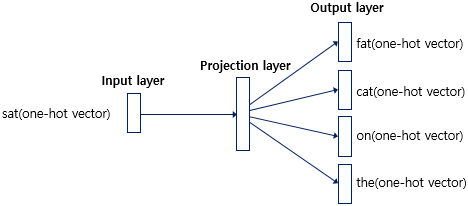\
CBOW와 달리 중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없다.\
여러 논문에서 성능 비교를 했을 때 전반적으로 Skip-Gram이 CBOW보다 성능이 좋다고 알려져 있다.

5. NNLM Vs. Word2Vec

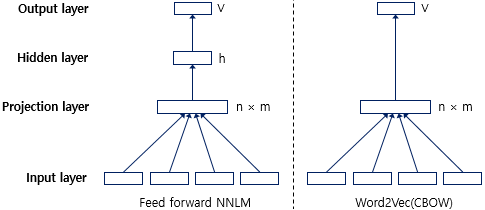\
NNLM(피드 포워드 신경망 언어 모델)은 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩 개념을 도입하였고, 워드 임베딩 자체에 집중하여 NNLM의 느린 학습 속도와 정확도를 개선하여 탄생한 것이 Word2Vec이다.

NNLM은 다음 단어를 예측하는 언어 모델이 목적이므로 다음 단어를 예측하지만, Word2Vec(CBOW)는 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측하게 하여 학습한다. \
NNLM은 예측 단어의 이전 단어들만을 참고한것과 달리 Word2Vec은 예측 단어의 전,후 단어들을 모두 참고한다.

Word2Vec이 NNLM보다 학습 속도에서 강점을 가지는 이유는 은닉층 제거뿐만 아니라, 추가적으로 사용되는 기법들 덕분이다.\
ex) 계층적 소프트맥스, 네거티브 샘플링